# Variational AutoEncoder (VAE)

## Learning Objectives

By the end of this lesson, you will be able to:
* Review stacked autoencoders <br/>
* Outline the basics of probability <br/>

## Stacked Autoencoder

* It is a neural network that produces an efficient and compressed representation of the input in an unsupervised way.
* The idea originated in the 1980s and was later promoted by the seminal paper by Hinton and Salakhutdinov, 2006.

### It consists of two networks:

* Encoder network: Converts the high-dimensional input into the low-dimensional code wherein the input size is larger than the output <br/>
* Decoder network: Recovers the data from the code to larger output layers
* Decoder is symmetric to the encoder in terms of layer structure.
* Number of nodes per layer decreases with each subsequent layer of the encoder and increases with each subsequent layer in the decoder. 



### Stacked Autoencoders are mainly used for image reconstruction


![alt text](https://drive.google.com/uc?id=1mTx3TOovZwlTaWq_FeXaSgbRXlPNwQ5J)

<br>
<br>
<br>


## Denoising Autoencoder
* In this type of autoencoder, the input is partially corrupted by adding noises or masking some values of the input vector in a stochastic manner, $x~∼MD(x~|x).$

* It trains the model to recover the original input (not the corrupt one).

![alt text](https://drive.google.com/uc?id=1yaCKpKqgrOeCJtr7h7pdvybNzzFVrglx)

## Sparse Autoencoder
* Regularizes the autoencoder by using a sparsity constraint such that only a small number of nodes will have non zero values. These nodes are called active nodes.
* Forces the model to have only a small number of hidden units activated at the same time, or in other words, one hidden neuron should be inactivate most of times
* Applies a **sparse** constraint on the hidden unit activation to avoid overfitting 

# Let's start with Autoencoders

#### We are creating two AutoEncoders (AutoEncoder1 and AutoEncoder2)
#### AutoEncoder1 will take clear image and try to regenerate clear image while training
#### AutoEncoder2 will take noisy image and try to regenerate clear image while training
##### we are testing both models with noisy image !!

In [1]:
from keras.layers import Input, Dense
from keras.models import Model

In [2]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
import matplotlib.pyplot as plt

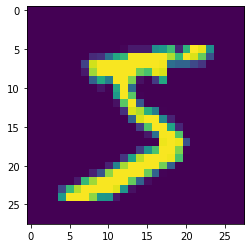

In [5]:
plt.imshow(x_train[0]);

In [6]:
x_train.min(), x_train.max()

(0, 255)

In [7]:
## Normalising the data between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

In [8]:
## reshaping the data in 2D
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [9]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

## AutoEncoder1

In [10]:
## Defining the AutoEncoder architecture

input_img = Input(shape=(784))
encoded1 = Dense(256, activation='relu')(input_img)
encoded2 = Dense(128, activation='relu')(encoded1)
decoded1 = Dense(256, activation='relu')(encoded2)
decoded2 = Dense(784, activation='sigmoid')(decoded1)

autoencoder1 = Model(input_img, decoded2)

Metal device set to: Apple M1


2022-09-18 20:46:54.298103: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-18 20:46:54.298197: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
autoencoder1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 784)               201488    
Total params: 468,368
Trainable params: 468,368
Non-trainable params: 0
_________________________________________________________________


In [12]:
autoencoder1.compile(optimizer='adam', loss='binary_crossentropy')

In [13]:
autoencoder1.fit(x_train, x_train, epochs=50, batch_size=256, validation_data=(x_test, x_test))

2022-09-18 20:46:56.996647: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-09-18 20:46:56.997707: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-09-18 20:46:57.167839: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1910 - val_loss: 0.1141
Epoch 2/50
  1/235 [..............................] - ETA: 1s - loss: 0.1137

2022-09-18 20:46:58.974624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 1s 6ms/step - loss: 0.1028 - val_loss: 0.0944
Epoch 3/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0909 - val_loss: 0.0862
Epoch 4/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0851 - val_loss: 0.0820
Epoch 5/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0816 - val_loss: 0.0794
Epoch 6/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0792 - val_loss: 0.0775
Epoch 7/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0775 - val_loss: 0.0762
Epoch 8/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0762 - val_loss: 0.0750
Epoch 9/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0750 - val_loss: 0.0740
Epoch 10/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0741 - val_loss: 0.0732
Epoch 11/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0733 - val_loss: 0.0734
Epoch 12/

In [14]:
## predicting for test data
decoded_image = autoencoder1.predict(x_test)

2022-09-18 20:48:15.093371: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


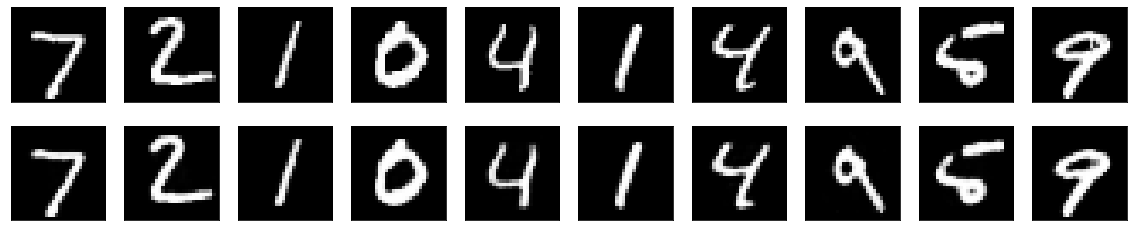

In [15]:
## Displaying original and regenerated images

n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_image[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

### Testing Autoencoder with noisy input images

In [16]:
## creating noisy images for test

x_test_noisy = x_test + 0.25 * np.random.normal(loc=0.0, scale=1.0, size=(x_test.shape))
x_test_noisy = np.clip(x_test_noisy, 0, 1)

decoded_noisy_image = autoencoder1.predict(x_test_noisy)

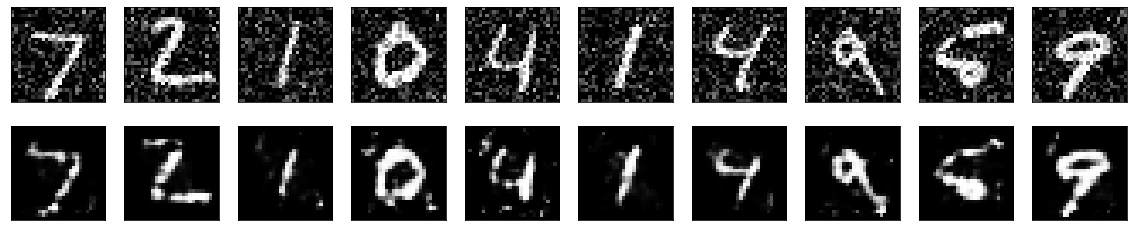

In [17]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_noisy_image[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

## Another AutoEncoder to denoise the images [AutoEncoder2]

In [18]:
## creating noisy images for train

x_train_noisy = x_train + 0.25 * np.random.normal(loc=0.0, scale=1.0, size=(x_train.shape))
x_train_noisy = np.clip(x_train_noisy, 0, 1)

## creating noisy images for test

x_test_noisy = x_test + 0.25 * np.random.normal(loc=0.0, scale=1.0, size=(x_test.shape))
x_test_noisy = np.clip(x_test_noisy, 0, 1)


In [19]:
## Defining the AutoEncoder architecture

input_img = Input(shape=(784))
encoded1 = Dense(256, activation='relu')(input_img)
encoded2 = Dense(128, activation='relu')(encoded1)
decoded1 = Dense(256, activation='relu')(encoded2)
decoded2 = Dense(784, activation='sigmoid')(decoded1)

autoencoder2 = Model(input_img, decoded2)

In [20]:
autoencoder2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_7 (Dense)              (None, 784)               201488    
Total params: 468,368
Trainable params: 468,368
Non-trainable params: 0
_________________________________________________________________


In [21]:
autoencoder2.compile(optimizer='adam', loss='binary_crossentropy')

In [22]:
## Training autoencoder to take noisy image as input and clear image as output

autoencoder2.fit(x_train_noisy, x_train, epochs=50, batch_size=256, validation_data=(x_test_noisy, x_test))

Epoch 1/50
  8/235 [>.............................] - ETA: 1s - loss: 0.6002 

2022-09-18 20:48:31.039043: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 2s 7ms/step - loss: 0.2060 - val_loss: 0.1317
Epoch 2/50
  1/235 [..............................] - ETA: 1s - loss: 0.1305

2022-09-18 20:48:32.708372: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 1s 6ms/step - loss: 0.1192 - val_loss: 0.1090
Epoch 3/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1056 - val_loss: 0.1004
Epoch 4/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0989 - val_loss: 0.0955
Epoch 5/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0950 - val_loss: 0.0927
Epoch 6/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0922 - val_loss: 0.0906
Epoch 7/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0904 - val_loss: 0.0890
Epoch 8/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0888 - val_loss: 0.0879
Epoch 9/50
235/235 [==============================] - 2s 6ms/step - loss: 0.0877 - val_loss: 0.0874
Epoch 10/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0867 - val_loss: 0.0865
Epoch 11/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0860 - val_loss: 0.0854
Epoch 12/

In [23]:
## predicting for test data
decoded_image = autoencoder2.predict(x_test_noisy)

2022-09-18 20:50:26.248901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


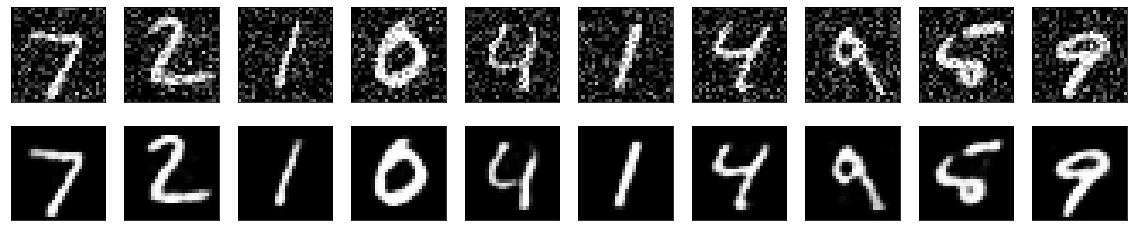

In [24]:
## Displaying original and regenerated images from autoencoder trained with noisy data is input !!

n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_image[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

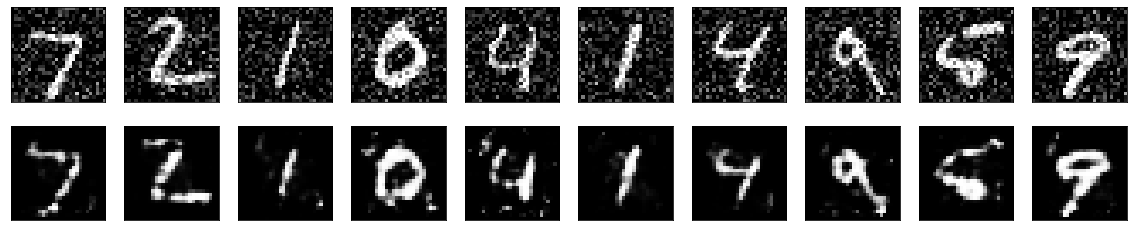

In [25]:
## Displaying original and regenerated images from autoencoder trained with clear data is input !!


n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_noisy_image[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)